In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as getcwd
import string
import re

In [9]:
def process_tweet(tweet):
    """
    Parameters:
    -----------
        tweet: string
        
    Returns:
    --------
        tweet_stem: list of stemmed words in tweet
    """
    tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    stopwords_english=stopwords.words('english')
    stemmer=PorterStemmer()
    
    tweet=re.sub(r'https://[^\s\n\r]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet_tokenized=tokenizer.tokenize(tweet)
    
    tweet_clean=[]
    for word in tweet_tokenized:
        if word not in stopwords_english and word not in string.punctuation:
            tweet_clean.append(word)
    
    tweet_stem=[]
    for word in tweet_clean:
        stem_word=stemmer.stem(word)
        tweet_stem.append(stem_word)
    
    return tweet_stem

In [10]:
def build_freqs(tweets,ys):
    """
    Parameters:
    -----------
        tweets: list of tweets
    
        ys: m x 1 array with the sentiment label (1 or 0)
    
    Returns:
    --------
        freqs: dict mapping each (word,sentiment) pair to its frequency
    """
    yslist=np.squeeze(ys).tolist()
    freqs={}
    for y,tweet in zip(yslist,tweets):
        for word in process_tweet(tweet):
            pair=(word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs

In [11]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
positive_tweets=twitter_samples.strings('positive_tweets.json')
negative_tweets=twitter_samples.strings('negative_tweets.json')
print('positive: ',len(positive_tweets))
print('negative: ',len(negative_tweets))
tweets=positive_tweets+negative_tweets
train_pos=positive_tweets[:4000]
train_neg=negative_tweets[:4000]
train_x=train_pos+train_neg

positive:  5000
negative:  5000


In [13]:
labels=np.append(np.ones(len(positive_tweets)),np.zeros(len(negative_tweets)))

#### loading dataset 

In [15]:
data=pd.read_csv('data/logistic_features.csv')
data.head()

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [26]:
X=data[['bias','positive','negative']].values
Y=data[['sentiment']].values

#### loading pretrained Logistic Regressoin model

In [22]:
theta=[6.0351887e-08,5.38184972e-04,-5.58300168e-04]

#### plot samples

Text(0, 0.5, 'negative')

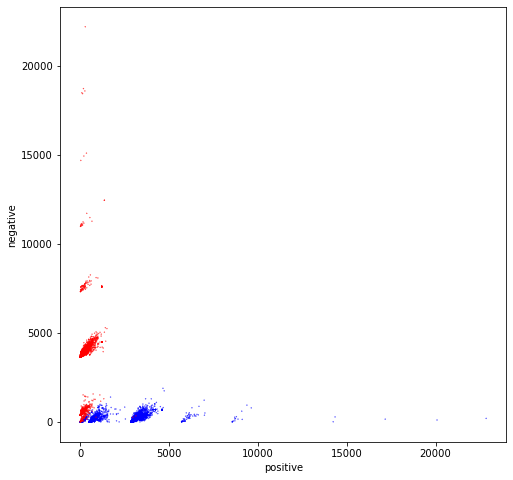

In [28]:
plt.figure(figsize=(8,8))
colors=['red','blue']
plt.scatter(X[:,1],X[:,2],color=[colors[int(k)] for k in Y],s=0.1)
plt.xlabel('positive')
plt.ylabel('negative')

#### plotting model

$$ z=\theta*x=0 $$

$$ x=[1,pos,neg] $$

$$ z(\theta)=\theta_0+\theta_1*pos+\theta_2*neg = 0 $$

$$ neg=-\frac{\theta_0+\theta_1*pos}{\theta_2} $$

$$ direction=\frac{pos*\theta_2}{\theta_1} $$

In [29]:
def neg(theta,pos):
    return -(theta[0]+theta[1]*pos)/theta[2]

def direction(theta,pos):
    return pos*theta[2]/theta[1]

Text(0, 0.5, 'negative')

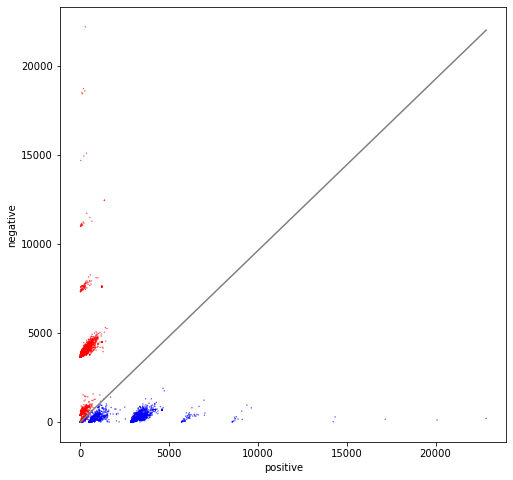

In [30]:
plt.figure(figsize=(8,8))
colors=['red','blue']
plt.scatter(X[:,1],X[:,2],color=[colors[int(k)] for k in Y],s=0.1)

maxpos=np.max(X[:,1])
plt.plot([0,maxpos],[neg(theta,0),neg(theta,maxpos)],color='gray')

plt.xlabel('positive')
plt.ylabel('negative')